### Importação_bibliotecas

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

Using TensorFlow backend.


### Arquivo_de_Entrada

In [2]:
# Dados dos EUA_sem_normalização
ent = pd.read_excel(r'X.xlsx', header=0)

In [3]:
ent.head(1)

,pibe_capita,pibe_areae,pope_areae,pibe_GWe,GWe_pope
0,0.046529,1.739276,37.380099,0.001599,29.099337


In [4]:
ent.info()
# Distrito de Colúmbia_retirado_outlier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
pibe_capita    50 non-null float64
pibe_areae     50 non-null float64
pope_areae     50 non-null float64
pibe_GWe       50 non-null float64
GWe_pope       50 non-null float64
dtypes: float64(5)
memory usage: 2.1 KB


### Arquivo_de_saída_EUA

In [5]:
output= pd.read_excel(r'ybio.xlsx', header=0)

In [6]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
bioSe    50 non-null float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [7]:
ent = ent.to_numpy()
# https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

In [8]:
output = output.to_numpy()

### Normalização dos dados - min & max

In [10]:
#Normalização dos dados de entrada -- variável explicativa
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ent = scaler.fit_transform(ent) # dados X: normalizados
# output = scaler.fit_transform(output) -- dados y: não normalizados

### Arquitetura de rede neural ANN

In [30]:
#Definição da ANN e suas camadas
import keras
from keras.models import Sequential
from keras.layers import Dense
# Rede Neural -- 5 entradas e 01 saída, camadas intermediárias (hidden)
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation = 'linear'))
opt = SGD(lr=0.009, momentum=0.9)

In [31]:
model.compile(loss='mean_squared_error', optimizer= opt)

### Definição operacional número de épocas

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ent,output,test_size =0.25, random_state=1234)
hist = model.fit(X_train, y_train, validation_data =(ent,output), epochs=100, verbose = 0)

### Métricas

In [33]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test , verbose=0)

Train: 52427905.297, Test: 30658064.000


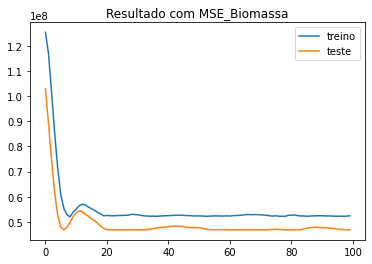

In [49]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
pyplot.title('Resultado com MSE_Biomassa')
pyplot.plot(hist.history['loss'], label='treino')
pyplot.plot(hist.history['val_loss'], label='teste')
pyplot.legend()
pyplot.show()

### Previsão_input_dados_Brasil

In [35]:
entb= pd.read_excel(r'Xb.xlsx', header=0)
# arquivo de entrada do Brasil_sem_DF_outlier

In [36]:
entb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
pibe_capita    26 non-null float64
pibe_area      26 non-null float64
pibe_GWe       26 non-null float64
pope_areae     26 non-null float64
GWe_pope       26 non-null float64
dtypes: float64(5)
memory usage: 1.1 KB


In [37]:
entb = entb.to_numpy()

In [38]:
outputb = model.predict(entb)

In [39]:
outputb

array([[8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315],
       [8112.315]], dtype=float32)

### Composição do arquivo de saída

In [40]:
outb=pd.DataFrame(data=outputb, columns=['Prev'])
outb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
Prev    26 non-null float32
dtypes: float32(1)
memory usage: 232.0 bytes


In [41]:
br= pd.read_excel(r'br_estado.xlsx', header=0)

In [42]:
br=br.drop(columns=['PIB em 2017 (1.000.000 R$)','Área (km2)','Geração de energia GW.h','População'])
br.head(1)

,Unidades da Federação
0,Acre


In [43]:
br = br.rename({'Unidades da Federação': 'Estado'}, axis = 1)

In [44]:
br = pd.DataFrame(data=br)

In [45]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
Estado    26 non-null object
dtypes: object(1)
memory usage: 336.0+ bytes


In [46]:
br1 = pd.DataFrame(data=outputb, columns=["Previsão"])
br1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
Previsão    26 non-null float32
dtypes: float32(1)
memory usage: 232.0 bytes


In [47]:
prv = pd.concat([br, br1], axis=1, sort=False)

In [48]:
prv.head(30)

,Estado,Previsão
0,Acre,8112.314941
1,Alagoas,8112.314941
2,Amapá,8112.314941
3,Amazonas,8112.314941
4,Bahia,8112.314941
5,Ceará,8112.314941
6,Espírito Santo,8112.314941
7,Goiás,8112.314941
8,Maranhão,8112.314941
9,Mato Grosso,8112.314941
